# Alura Store
# Tabla de contenido
- [Preprocesamiento y justificación](#0.-Preprocesamiento-y-justificación)
- [Análisis de facturación](#1.-Análisis-de-facturación)
- [Ventas por categoría](#2.-Ventas-por-categoría)
- [Calificación promedio de la tienda](#3.-Calificación-promedio-de-la-tienda)
- [Productos más y menos vendidos](#4.-Productos-más-y-menos)
- [Envío promedio por tienda](#5.-Envío-promedio-por-tienda)
- [Análisis geográfico](#6.-Análisis-geográfico)
- [Conclusión](#7.-Conclusión)

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 0. Preprocesamiento y justificación
**Justificación**

En este cuaderno se analiza cuál es la tienda con el menor desempeño para que el señor Juan la pueda vender a cambio de una gran inversión. Los factores que se van a tomar en cuenta para escoger cuál de las 4 tiendas que posee el señor Juan es la peor, para así poder venderla, son:
1. Los **ingresos totales** de las tiendas.
2. Las **categorías de productos** más y menos vendidas.
3. Las **calificaciones promedio** de los clientes en las tiendas.
4. Los **productos más y menos vendidos**.
5. El **coste de envío promedio** de cada tienda.
6. El **análisis geográfico** por municipio.

**Estructura de datos**

El conjunto de datos incluye la siguiente información:
* Producto y Categoría: Artículos vendidos y sus calificaciones.
* Precio y Envío: Valores de venta y costos asociados.
* Fecha y ubicación de compra: Información temporal y geográfica.
* Evaluación de compra: Comentarios de clientes.
* Tipo de Pago y Cuotas: Métodos utilizados por los clientes.
* Coordenadas Geográficas: Ubicación de las transacciones.

# 1. Análisis de facturación

In [2]:
lista = [tienda, tienda2, tienda3, tienda4]

print("Ingreso total de cada tienda:")

revenues = {}

for i in range(len(lista)):
    total = lista[i]['Precio'].sum()
    print(f"Tienda {i+1}: {total}")
    revenues[f"Tienda {i+1}"] = total

Ingreso total de cada tienda:
Tienda 1: 1150880400.0
Tienda 2: 1116343500.0
Tienda 3: 1098019600.0
Tienda 4: 1038375700.0


In [3]:
list(revenues.values())

[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]

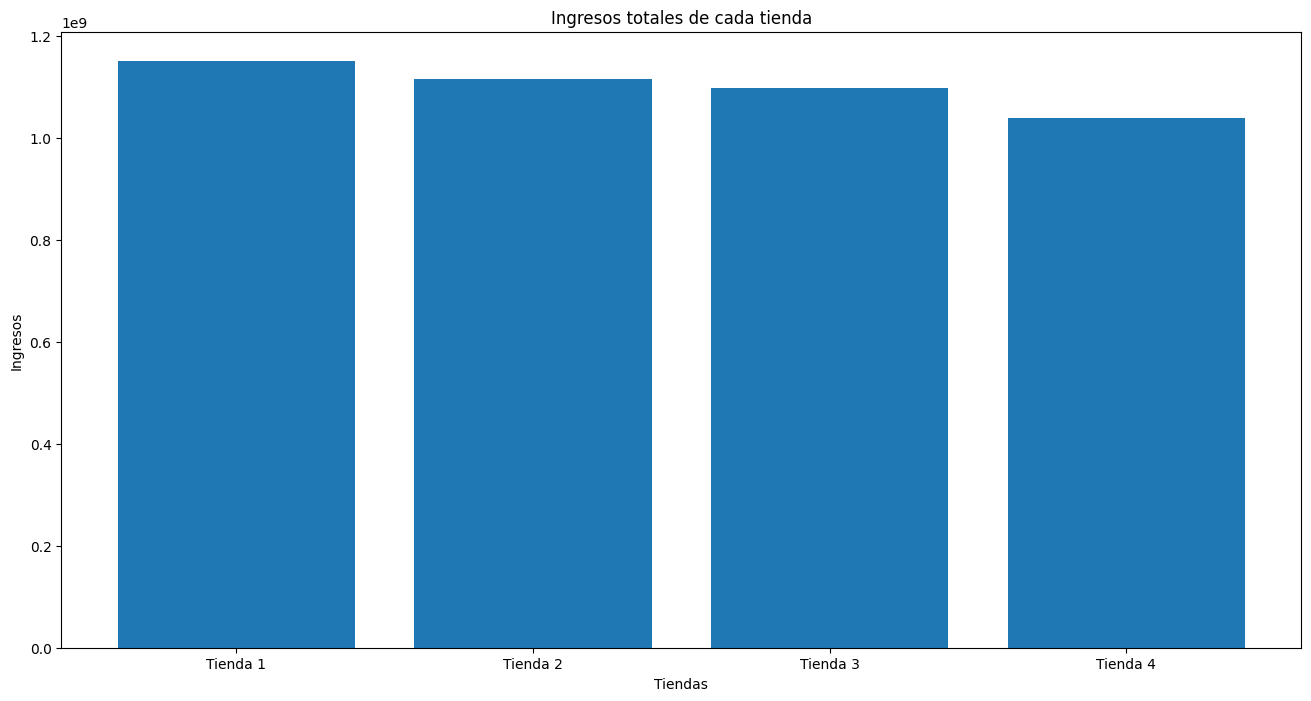

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.bar(list(revenues.keys()), list(revenues.values()))
plt.title("Ingresos totales de cada tienda")
plt.xlabel("Tiendas")
plt.ylabel("Ingresos")
plt.show()

# 2. Ventas por categoría

In [5]:
categories = {}

for i in range(len(lista)):
    sales = lista[i]["Categoría del Producto"].value_counts()
    print(f"Ventas por categoría de tienda {i+1}\n\n", sales, "\n")
    categories[f"Tienda {i+1}"] = dict(sales)

Ventas por categoría de tienda 1

 Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64 

Ventas por categoría de tienda 2

 Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64 

Ventas por categoría de tienda 3

 Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64 

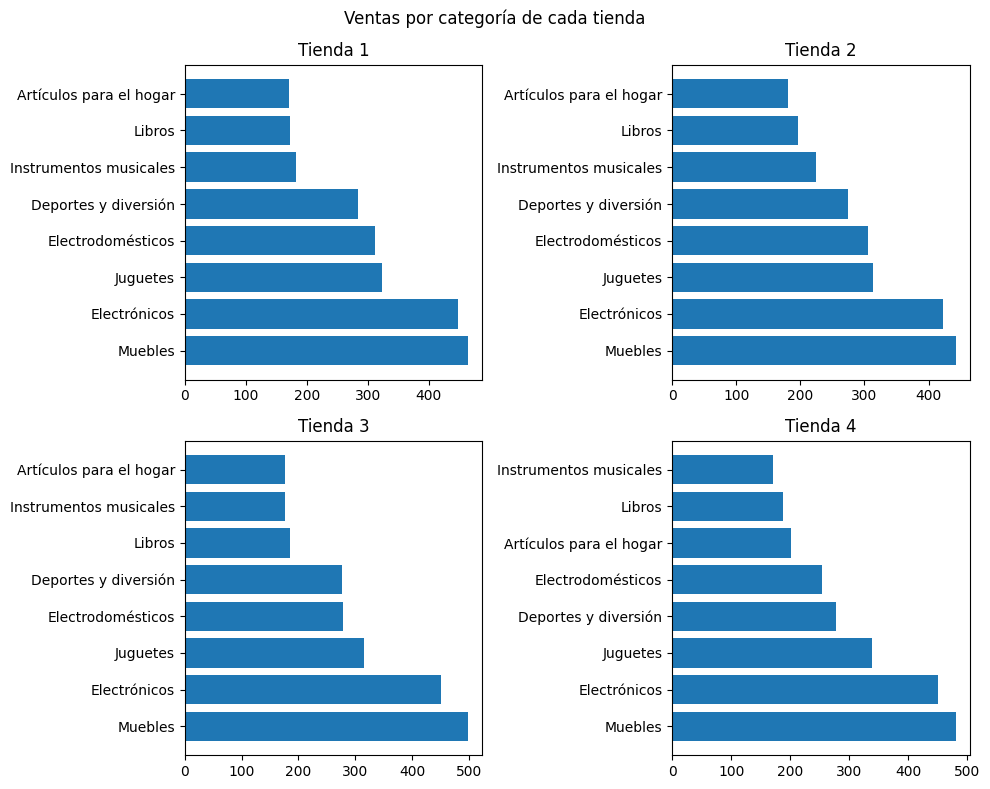

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].set_title("Tienda 1")
axs[0, 0].barh(list(categories["Tienda 1"].keys()), list(categories["Tienda 1"].values()))

axs[0, 1].set_title("Tienda 2")
axs[0, 1].barh(list(categories["Tienda 2"].keys()), list(categories["Tienda 2"].values()))

axs[1, 0].set_title("Tienda 3")
axs[1, 0].barh(list(categories["Tienda 3"].keys()), list(categories["Tienda 3"].values()))

axs[1, 1].set_title("Tienda 4")
axs[1, 1].barh(list(categories["Tienda 4"].keys()), list(categories["Tienda 4"].values()))

fig.suptitle("Ventas por categoría de cada tienda")

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [7]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [8]:
print("Calificación promedio de cada tienda:")

for i in range(len(lista)):
    print(f"Tienda {i+1}: {lista[i]['Calificación'].mean():.2f}")

Calificación promedio de cada tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [9]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [10]:
for i in range(len(lista)):
    print(f"\nProductos más vendidos en tienda {i+1}:\n\n", 
          lista[i]["Producto"].value_counts().head(5), 
          f"\n\nProductos menos vendidos en tienda {i+1}:\n\n", 
          lista[i]["Producto"].value_counts().tail(5)
         )


Productos más vendidos en tienda 1:

 Producto
TV LED UHD 4K              60
Armario                    60
Microondas                 60
Secadora de ropa           58
Bloques de construcción    56
Name: count, dtype: int64 

Productos menos vendidos en tienda 1:

 Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

Productos más vendidos en tienda 2:

 Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64 

Productos menos vendidos en tienda 2:

 Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

Productos más vendidos en tienda 3:

 Producto
Kit de bancas      57
Cama king          56
Mesa de comedor 

# 5. Envío promedio por tienda

In [11]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [12]:
print("Envió promedio de cada tienda:")
for i in range(len(lista)):
    print(f"Tienda {i+1}: {lista[i]['Costo de envío'].mean():.2f}")

Envió promedio de cada tienda:
Tienda 1: 26018.61
Tienda 2: 25216.24
Tienda 3: 24805.68
Tienda 4: 23459.46


# 6. Análisis geográfico

In [13]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

In [14]:
places = {}

for i in range(len(lista)):
    places[f"Tienda {i+1}"] = dict(lista[i]["Lugar de Compra"].value_counts())

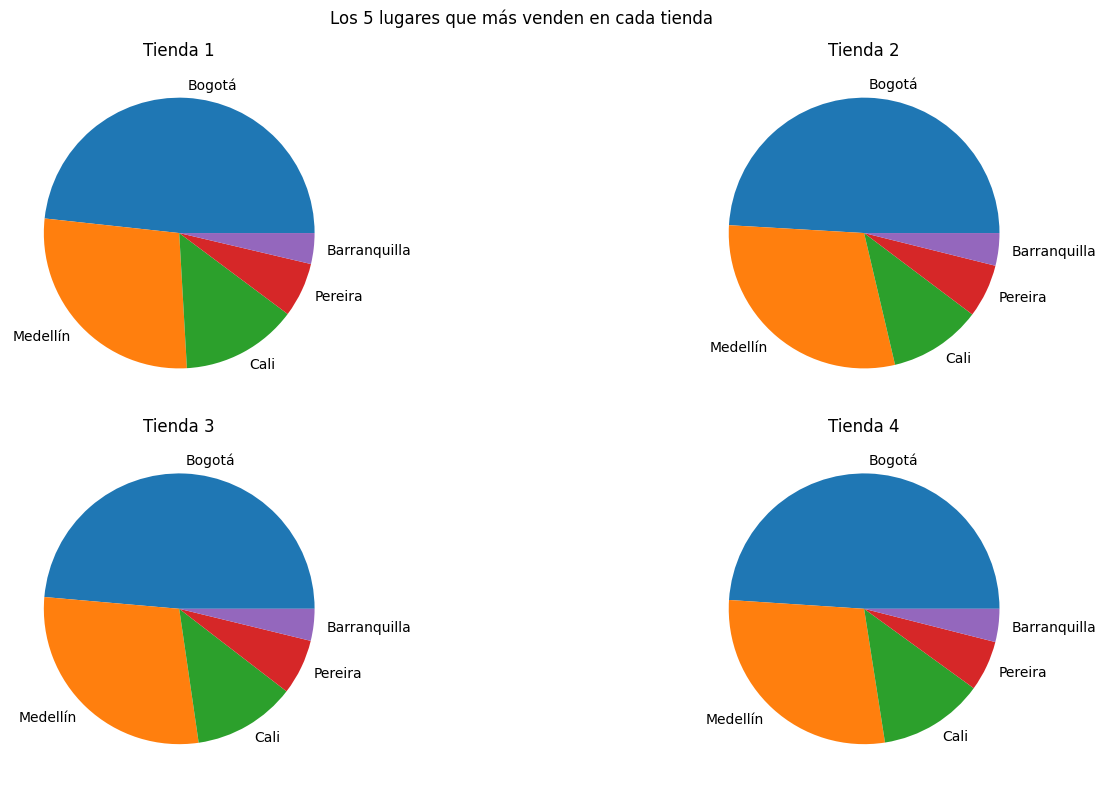

In [15]:
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(16, 8))

axs[0, 0].set_title("Tienda 1")
axs[0, 0].pie(np.array(list(places["Tienda 1"].values()))[0:5]/sum(places["Tienda 1"].values()), labels=list(places["Tienda 1"].keys())[0:5])

axs[0, 1].set_title("Tienda 2")
axs[0, 1].pie(np.array(list(places["Tienda 2"].values()))[0:5]/sum(places["Tienda 2"].values()), labels=list(places["Tienda 2"].keys())[0:5])

axs[1, 0].set_title("Tienda 3")
axs[1, 0].pie(np.array(list(places["Tienda 3"].values()))[0:5]/sum(places["Tienda 3"].values()), labels=list(places["Tienda 3"].keys())[0:5])

axs[1, 1].set_title("Tienda 4")
axs[1, 1].pie(np.array(list(places["Tienda 4"].values()))[0:5]/sum(places["Tienda 4"].values()), labels=list(places["Tienda 4"].keys())[0:5])

fig.suptitle("Los 5 lugares que más venden en cada tienda")

plt.tight_layout()
plt.show()

# 7. Conclusión
Una vez trabajados los 6 factores, podemos concluir que la tienda que debería de vender el señor *Juan* es la **tienda 1**. Las razones se explican a continuación:
1. La **tienda 1** es la tienda con el menor puntaje de la calificación promedio de los clientes. Esto indica que los clientes no están satisfechos con los productos vendidos (que en su mayoría se pueden componer de `muebles`, `electrónicos` o `jugetes`), vienen defectuosos o no cumplen con las expectativas de estos.
2. La razón anterior se relaciona con el hecho de que, si bien es la tienda con la *mayor cantidad de ingresos*, es también la que la que *mayor costo de envío* tiene.

Esto, sumado con la calificación de los clientes, indica que los productos que se vende no son de alta calidad y la tienda podría perder sus ganancias con el tiempo, perdiendo un equilibrio con el coste del envío.

Las comparaciones entre las otras tiendas no varían mucho, pero cada una de estas posee aspectos diferentes (como la *tienda 4*, que tiene el menor coste de envío; o la *tienda 3*, que tiene la mejor calificación de clientes). Esto puede generar oportunidades de mejora para cada tienda y resolver sus problemas fácilmente o no generan preocupaciones a futuro (como la *tienda 2*, donde sus indicativos son los más constantes).

Finalmente, el análisis geográfico indica que *Bogotá* es la municipio donde más se realizan las compras, pero eso puede depender de la concentración de población del país ([este enlace](https://es.wikipedia.org/wiki/Anexo:Municipios_de_Colombia_por_poblaci%C3%B3n) muestra los municipios por población).

**Conclusión:** Debido a los factores discutidos, la mejor tienda para vender y hacer la inversión es la **tienda 1**.